In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read csv file into Pandas data frame
bank_loans = pd.read_csv("../data/cleaned_data/cleaned_bank_loan_modeling.csv")

# Displays the csv file
bank_loans.head()

,Age,Years Work Experience,Income,ZIP Code,Family Size,Monthly Credit Card Spending,Education Level,Value of Mortgage,Personal Loan
0,25,1,49000,91107,4,1600,Undergrad,0,No
1,45,19,34000,90089,3,1500,Undergrad,0,No
2,39,15,11000,94720,1,1000,Undergrad,0,No
3,35,9,100000,94112,1,2700,Graduate,0,No
4,35,8,45000,91330,4,1000,Graduate,0,No


In [2]:
# Groups the data frame into people who do and do not have personal loans
grouped = bank_loans.groupby("Personal Loan")

# Pulls out the income column of the grouped data frame
income = grouped["Income"]

# Determines the mean income of people who do and do not have personal loans
income_mean = income.mean()

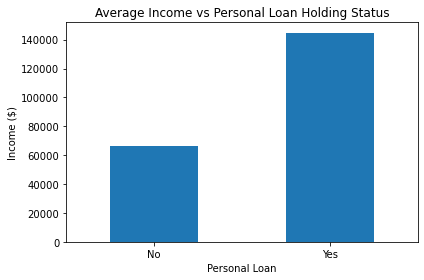

In [4]:
# Plots a bar chart comparing the income of clients who do and do not have personal loans
plot = income_mean.plot(kind="bar", ylabel="Income ($)", rot=0,
                        title="Average Income vs Personal Loan Holding Status")

# Saves plot in appropriate file as png
plt.tight_layout()
plt.savefig("../Graphs/income_plots/income_loans_bar.png")

In [5]:
# Showing the min and max to help determine bins
income.describe()

,count,mean,std,min,25%,50%,75%,max
Personal Loan,,,,,,,,
No,4520.0,66237.389381,40578.534417,8000.0,35000.0,59000.0,84000.0,224000.0
Yes,480.0,144745.833333,31584.429440,60000.0,122000.0,142500.0,172000.0,203000.0


In [6]:
# Creates bins and names for different income ranges
b = [0, 25000, 75000, 150000, 225000]
groupnames = ["<$25,000", "$25,000-74,999", "$75,000-149,999", "$150,000-225,000"]

# Adds a new column income ranges based on the income of the current row
bank_loans["Income Ranges"] = pd.cut(bank_loans["Income"], bins=b, labels=groupnames, 
                                    include_lowest=True)

# Checks that the new column was added
bank_loans.head()

,Age,Years Work Experience,Income,ZIP Code,Family Size,Monthly Credit Card Spending,Education Level,Value of Mortgage,Personal Loan,Income Ranges
0,25,1,49000,91107,4,1600,Undergrad,0,No,"$25,000-74,999"
1,45,19,34000,90089,3,1500,Undergrad,0,No,"$25,000-74,999"
2,39,15,11000,94720,1,1000,Undergrad,0,No,"<$25,000"
3,35,9,100000,94112,1,2700,Graduate,0,No,"$75,000-149,999"
4,35,8,45000,91330,4,1000,Graduate,0,No,"$25,000-74,999"


In [7]:
# Groups the data frame into the income ranges and then by if they have a personal loan
income_ranges = bank_loans.groupby(["Income Ranges", "Personal Loan"])

# Determines how many people are in each section of the grouped dataframe
count = income_ranges.count()

# Pulls out the count of just the income column
count_income = count["Income"]
count_income

Income Ranges     Personal Loan
<$25,000          No                672
                  Yes                 0
$25,000-74,999    No               2279
                  Yes                 7
$75,000-149,999   No               1345
                  Yes               255
$150,000-225,000  No                224
                  Yes               218
Name: Income, dtype: int64

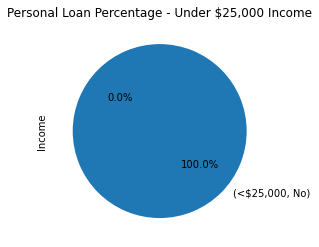

In [8]:
# Plots the percent of clients with a personal loan and an income less than $25,000 yearly
plot = count_income.iloc[0:2].plot(kind="pie", autopct="%1.1f%%", startangle=140, 
                                  title="Personal Loan Percentage - Under $25,000 Income")

# Saves plot in appropriate file as png
plt.savefig("../Graphs/income_plots/income_bin1_loans_pie.png")

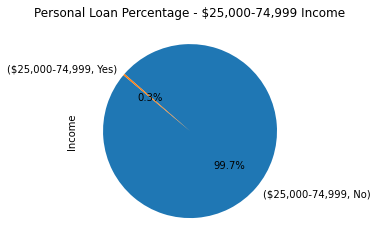

In [9]:
# Plots the percent of clients with a personal loan and an income between than $25,000-74,999 yearly
plot = count_income.iloc[2:4].plot(kind="pie", autopct="%1.1f%%", startangle=140, 
                                  title="Personal Loan Percentage - $25,000-74,999 Income")

# Saves plot in appropriate file as png
plt.savefig("../Graphs/income_plots/income_bin2_loans_pie.png")

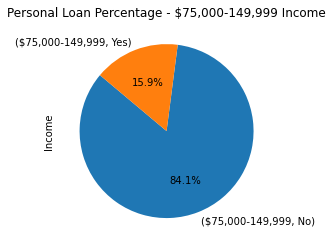

In [10]:
# Plots the percent of clients with a personal loan and an income between $75,000-149,999 yearly
plot = count_income.iloc[4:6].plot(kind="pie", autopct="%1.1f%%", startangle=140, 
                                  title="Personal Loan Percentage - $75,000-149,999 Income")

# Saves plot in appropriate file as png
plt.savefig("../Graphs/income_plots/income_bin3_loans_pie.png")

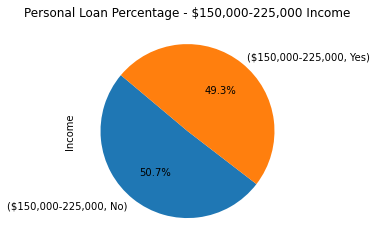

In [11]:
# Plots the percent of clients with a personal loan and an income between $150,000-225,000 yearly
plot = count_income.iloc[6:8].plot(kind="pie", autopct="%1.1f%%", startangle=140, 
                                  title="Personal Loan Percentage - $150,000-225,000 Income")

# Saves plot in appropriate file as png
plt.savefig("../Graphs/income_plots/income_bin4_loans_pie.png")